* Assuming only linear additive models
* atleast 10 buckets
* source profile should be a distribution
* Assuming gaussian source profile





# save images and data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

## these are the hyper parameters, change as reqd.

n=100000
start=0.001
end=100
NOISE = 0.05 # noise coeff

# distributions (gaussian)
x_fac=0.001 # set to 1


info1={"coeff":2.5,"mean":math.log(0.018,10),"variance":math.pow(math.log(1.60,10),2)}
info2={"coeff":4.3,"mean":math.log(0.210,10),"variance":math.pow(math.log(1.80,10),2)}
info3={"coeff":6.0,"mean":math.log(4.900,10),"variance":math.pow(math.log(1.87,10),2)}

# info1={"coeff":10000,"mean":math.log(0.01,10),"variance":math.pow(math.log(1.60,10),2)}
# info2={"coeff":6250,"mean":math.log(0.05,10),"variance":math.pow(math.log(1.60,10),2)}
# info3={"coeff":2500,"mean":math.log(0.25,10),"variance":math.pow(math.log(1.60,10),2)}

graphs={"1":info1,"2":info2,"3":info3}


In [2]:
def gaussian(info=None,x=None,train=False):
    if info==None:
        coeff=1
        mean=0
        variance=1
    else:
        coeff=info["coeff"]
        mean=info["mean"]
        variance=info["variance"]
#         print(coeff)
    if train==True:
        coeff=1
    if x==None:
        x=np.random.rand()
    y=coeff*np.exp(-(math.log(x,10)-mean)**2/(2*variance))
    return y


def plotter(graphs,x,estm=None):
    y=[]
    for i in x:
        sum=0
        for num,key in enumerate(graphs.keys()):
            if estm!=None:
                graphs[key]["coeff"]=estm[num]
            sum+=gaussian(graphs[key],i)
        y.append(sum)
    return y


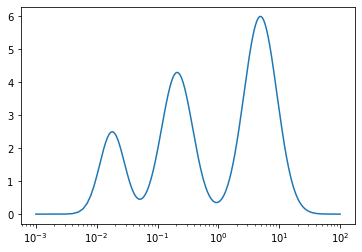

In [3]:

x=[]
y=[]

for i in range(n):
    x.append((i*(end-start)/n+start))
y=plotter(graphs,x)
plt.plot(x,y)
plt.xscale("log")
# plt.plot([0.018,0.018],[1,6])

In [300]:
LOAD=False

In [301]:
train_data_x=[]
train_data_y=[]
if LOAD:
    t=np.load(".\data\simulated\data_points.npy",allow_pickle=True)
    train_x=t[0]
    train_y=t[1]
    NOISE=0
    graphs=np.load(".\data\simulated\graphs.npy",allow_pickle=True)
    graphs=graphs.all()
else:
    train_x=[]
    train_y=[]
    for i in range(15):
        index=np.random.randint(0,len(x)-1)
        train_x.append(x[index])
        train_y.append(y[index])
    
    
    
for t_x in train_x:
    temp=[]
    for key in graphs.keys():
        temp.append(gaussian(graphs[key],t_x,True))
    train_data_x.append(temp)
train_data_y=[]
for t_y in train_y:
    train_data_y.append(t_y+np.random.randn()*0.05*NOISE)
# plt.scatter(train_x,train_y)
train_y=train_data_y

In [198]:
from sklearn import linear_model 
train_data_x=np.array(train_data_x)
train_data_y=np.array(train_data_y)
test_data_x=train_data_x[10:]
test_data_y=train_data_y[10:]
train_data_x=train_data_x[:10]
train_data_y=train_data_y[:10]

# # reg = linear_model.LinearRegression()
# reg = linear_model.Lasso(alpha=0.001)
# # reg = linear_model.Ridge(alpha=0.01)
# reg.fit(train_data_x, train_data_y)
# # reg.score(X, y)
# print(reg.coef_)

# np.append(train_data_x,20)
# np.append(train_data_y,0.5)

In [274]:
SAVE= False
LOG_SCALE=True

[-1.00251084e-24 -3.39677315e+11  6.31500244e+00]
-1.524327986497819


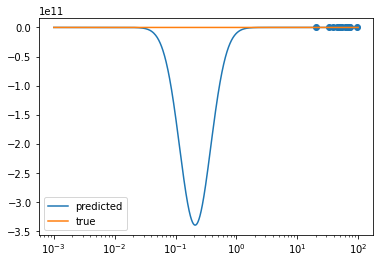

[0. 0. 0.]
-411.41162070010273


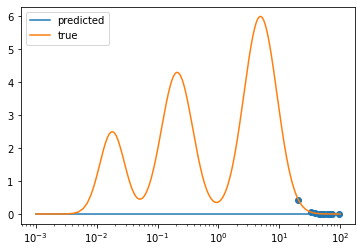

[4.67884674e-48 1.59758321e-12 1.86744589e+00]
-186.30717365257973


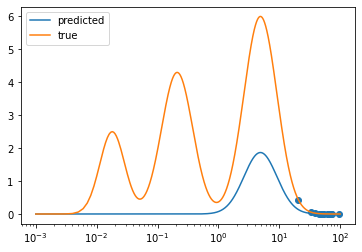

In [200]:
if SAVE:
    np.save(".\data\simulated\graphs.npy",np.array(graphs))
    np.save(".\data\simulated\data_points.npy",np.array([train_x,train_y]))

reg = linear_model.LinearRegression()
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
print(reg.score(test_data_x, test_data_y))
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_y)
plt.legend() 
if LOG_SCALE:
    plt.xscale("log")
if SAVE:
    plt.savefig('.\pic\Linear_reg_log.png',dpi=1200)

plt.show()

##
reg = linear_model.Lasso(alpha=0.01)
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
print(reg.score(test_data_x, test_data_y))
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_y)
plt.legend()
if LOG_SCALE:
    plt.xscale("log")
if SAVE:
    plt.savefig('.\pic\Lasso_reg_log.png',dpi=1200)
plt.show()

##
reg = linear_model.Ridge(alpha=0.01)
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
print(reg.score(test_data_x, test_data_y))
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_y)
plt.legend()
if LOG_SCALE:
    plt.xscale("log")
if SAVE:
    plt.savefig('.\pic\Ridge_reg_log.png',dpi=1200)

plt.show()

In [88]:
reg.intercept_

-0.028939460867794864

In [206]:
test_data_x

array([[7.80313088e-64, 3.98396466e-20, 6.19577168e-04],
       [2.00042614e-66, 2.79540718e-21, 2.20368280e-04],
       [9.10506630e-73, 3.81961233e-24, 1.45613736e-05],
       [4.39439999e-66, 3.97390703e-21, 2.53234574e-04],
       [5.19364624e-68, 5.43818197e-22, 1.14444181e-04]])

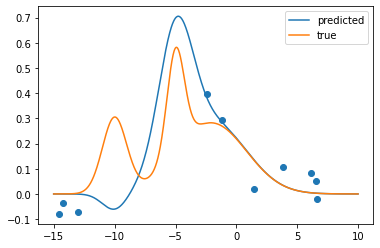

In [8]:
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend() 

[0.3  0.02 0.4  0.28]


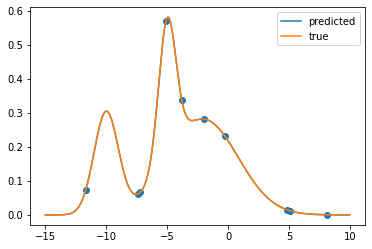

[0.06130039 0.01488079 0.39047113 0.25953978]


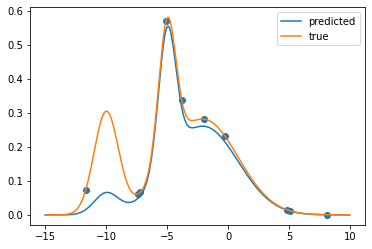

[0.2435829  0.03458334 0.38132971 0.27300359]


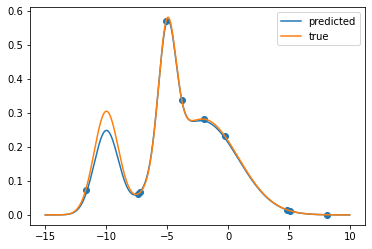

In [195]:
reg = linear_model.LinearRegression()
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend() 
plt.show()

##
reg = linear_model.Lasso(alpha=0.001)
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend() 
plt.show()

##
reg = linear_model.Ridge(alpha=0.01)
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend() 
plt.show()

In [302]:
import pandas as pd
data=pd.read_csv("data/real_world/Source_Contribution.csv")

train_x=[0.3,0.5,1,2.5]
X=data[["0.3", "0.5", "1", "2.5"]].values
Y=data[["S1","S2","S3","S4","S5"]].values   
data.head()

,S1,S2,S3,S4,S5,PM2.5,0.3,0.5,1,2.5
0,2.120000e-08,9.089456,2.029430e-02,0.709402,9.620000e-07,32.305000,5042.348333,1536.580000,342.755000,35.515000
1,3.710000e-09,5.940313,3.170000e-07,2.319856,6.010000e-07,0.018889,75.159259,20.643148,1.595741,0.268333
2,1.810000e-11,12.731897,8.030000e-16,0.000022,2.380000e-06,0.394792,145.481875,40.542153,3.291042,0.350764
3,1.050000e-07,8.888465,6.705381e-01,6.168194,4.110000e-12,0.009091,14.297153,3.995347,0.643194,0.307500
4,1.940000e-09,8.458632,3.271445e+00,2.832338,1.500000e-13,0.082222,89.099306,24.470000,1.885278,0.362639


In [321]:
INSTANCE=22

train_data_x=[]
for t_x in train_x:
    temp=[]
    for key in graphs.keys():
        temp.append(gaussian(graphs[key],t_x,True))
    train_data_x.append(temp)
test_data_x=train_data_x[-1:]
test_data_y=X[INSTANCE][-1:]
train_data_y=X[INSTANCE][:-1]
train_data_x=train_data_x[:-1]

[3.33007419e-04 3.46442826e+02 1.18321720e+03]
nan


d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


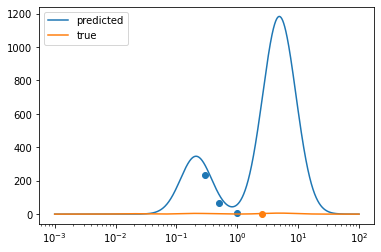

[   0.          342.36437071 1094.92145755]
nan


d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


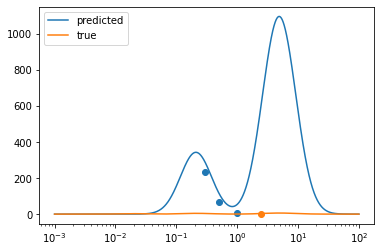

[1.73952112e-05 2.85619466e+02 2.81930045e+01]
nan


d:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


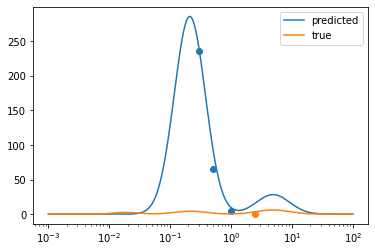

In [322]:
if SAVE:
    np.save(".\data\simulated\graphs_gr1.npy",np.array(graphs))
    np.save(".\data\simulated\data_points_gr1.npy",np.array([train_x,train_y]))

reg = linear_model.LinearRegression()
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
print(reg.score(test_data_x, test_data_y))
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x[:-1],train_data_y)
plt.scatter(train_x[-1:],test_data_y)
plt.legend() 
if LOG_SCALE:
    plt.xscale("log")
if SAVE:
    plt.savefig('.\pic\Linear_reg_gr1.png',dpi=1200)

plt.show()

##
reg = linear_model.Lasso(alpha=0.01)
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
print(reg.score(test_data_x, test_data_y))
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x[:-1],train_data_y)
plt.scatter(train_x[-1:],test_data_y)
plt.legend()
if LOG_SCALE:
    plt.xscale("log")
if SAVE:
    plt.savefig('.\pic\Lasso_reg_gr1.png',dpi=1200)
plt.show()

##
reg = linear_model.Ridge(alpha=0.01)
reg.fit(train_data_x, train_data_y)
print(reg.coef_)
print(reg.score(test_data_x, test_data_y))
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x[:-1],train_data_y)
plt.scatter(train_x[-1:],test_data_y)
plt.legend()
if LOG_SCALE:
    plt.xscale("log") 
if SAVE:
    plt.savefig('.\pic\Ridge_reg_gr1.png',dpi=1200)

plt.show()

In [323]:
coef_=reg.coef_
coef_=coef_/np.sum(coef_)
print(coef_)
print(Y[INSTANCE]/np.sum(Y[INSTANCE]))

#11 22 35 

[5.54318641e-08 9.10159656e-01 8.98402886e-02]
[5.51163888e-01 2.47778963e-04 1.23206319e-02 4.36267701e-01
 1.04754869e-10]


In [324]:
print(coef_*100)

[5.54318641e-06 9.10159656e+01 8.98402886e+00]


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(np.array(train_x), train_data_y)
print(reg.coef_)
y_new=plotter(graphs,x,list(reg.coef_))
plt.plot(x,y_new, label="predicted")
plt.plot(x,y, label="true")
plt.scatter(train_x,train_data_y)
plt.legend() 
plt.show()

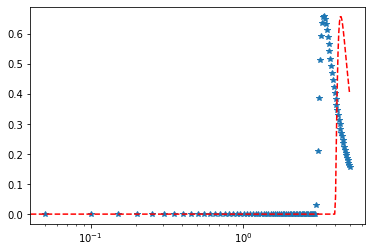

In [67]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import lognorm  
     
x = np.linspace(0, 5, 100) 
     
# Varying positional arguments 
y1 = lognorm .pdf(x, 1, 3) 
y2 = lognorm .pdf(x, 1, 4) 
plt.plot(x, y1, "*", x, y2, "r--") 
plt.xscale("log")

In [304]:
p=[1,2,3]
p[:-1]

[1, 2]

In [ ]:
https://www.researchgate.net/publication/298434201_Particulate_Air_Pollution_and_Health_Emerging_Issues_and_Research_Needs_Related_to_the_Development_of_Air_Quality_Standards/figures?lo=1